# Python Lists

## Creating

In [2]:
# this is a python list
a = [42, 7, 13, 24601, 2001, 3.50]

In [3]:
# this is a list comprehension -- think of it as a sexy for loop

# the following gives us a list in which we multiplied each element in a by 2
z = [i * 2 for i in a]
z

[84, 14, 26, 49202, 4002, 7.0]

## Indexing

In [4]:
# you can index into it
a[0]

42

In [5]:
# what's the 3rd element?
a[2]

13

In [6]:
# indices can also be negative
# this gives you the last element
a[-1]

3.5

## Slicing

In [15]:
# you can also get subsets of the list with slicing
#     a[start:end]
# [start, end)

# this returns the 3rd and 4th entries (indices 2 and 3 -- note we exclude 4!)
a[2:4]

[3, 4]

In [16]:
# if you leave one side blank, it automatically goes all the way
# first five:
a[:5]

[1, 2, 3, 4, 5]

In [17]:
# how do you get the last three elements?
a[3:]

[4, 5, 6]

In [18]:
# slices can also skip numbers
# a[start:end:interval]

# this gives us every other number, starting with the first
a[::2]

[1, 3, 5]

In [19]:
# the interval can also be negative
# what does that do?

a[::-2]

[6, 4, 2]

# Numpy

In [29]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

## Creating

In [30]:
# numpy arrays can be created from a python list
b = np.array(a)
b

NameError: name 'np' is not defined

Right now, it looks an awful like a python list, but there are some key points you should know.

numpy arrays are:
- homogeneous (all elements in an array have the same type)
- multidimensional

In [ ]:
# Homogeneous: all numpy arrays have an associated data type.
# numbers are usually ints or floats
b.dtype

In [ ]:
# Multidimensional: numpy arrays can have multiple dimensions, like a nested list.
# We can reshape b into a 3x2 matrix
# Note: this doesn't change b. That's why we assign it to a new variable: m
m = b.reshape(3, 2)
m

In [ ]:
# Each dimension is called an axis
# The size across each axis is called the shape
# These are two very important concepts!
m.shape

## Indexing

In [ ]:
# We index into numpy arrays much the same way as python lists.
b[0]

In [ ]:
# But N-dimensional arrays mean we can be more expressive with indexing
# This gives us [0th index of axis 0, 1st index of axis 1]
# You can think of this as a grid
# Alternatively, this is like m[0][1]
m[0, 1]

In [ ]:
# We can also pass in multiple indices as a list
# This gives us the 1st, 2nd, and 5th values of b
b[[0, 1, 4]]

In [ ]:
# Let's combine these two facts to get the 2nd and 3rd items in the second column of m
m[1, [1, 2]]

In [ ]:
# We can also incorporate our previous knowledge of slices.
# So to get the second column
# This gives us the entire range on axis 0, and only the 1st index on axis 1
m[:,1]

## Math

In [ ]:
# numpy gives us a lot of math functions to work with
# I'll only show you a couple, but you can find them all in the documentation

np.sum(b)  # guess what this does?

In [ ]:
np.mean(b)  # and this?

In [ ]:
# for convenience, you can also call
b.mean()

In [ ]:
# you can also apply these functions to only one axis
# only sum across rows (read: apply the sum to axis 1)
np.sum(m, axis=1)

In [ ]:
# numpy has a concept called podcasting
# It tries to coerce non-matching shapes.
# 2 is a scalar, but we can still multiply m by it
# it just repeats the 2 across all instances of m
m * 2

# Pandas

In [ ]:
import pandas as pd

## Creating

Pandas lets us read all sorts of data into a Dataframe. Think of this as a series of lists. Let's look at an example.

In [ ]:
df = pd.read_csv("./cereal.csv")
type(df)

In [ ]:
# head() gives us the first 10 rows in the dataframe (pd.DataFrame)
df.head()

In [ ]:
# you can think of each column as a list (or a 1D numpy array)
# in practice, these are called pandas Series (pd.Series)
# you can index into the dataframe with a string to get one column
df["name"]

In [ ]:
type(df["name"])

## Pandas Series vs Numpy Arrays

In [ ]:
# There are many similarities between pd.Series and np.ndarray
# for example:
df["carbo"].mean()

In [ ]:
# In fact, we can turn pd.Series into a numpy array
# again, this returns a numpy array -- df["carbo"] doesn't change.
df["carbo"].to_numpy()

In [ ]:
# The key difference is that Series are indexed
# See the 0, 1, ... 76 on the left? That is the index of each item.
# Right now they are just positions, but theoretically they can be any unique identifier for the row
# Think: ID, username, etc
df["carbo"].index

## Indexing into DataFrames and Series

In [ ]:
# Indexing is a little bit different in pandas.
# One parallel to what you've been used to is .loc[]
# this is the row at index 0
df.loc[0]

In [ ]:
# multiple indices work
df.loc[[1, 2, 3]]

In [ ]:
# caveat: remember that pandas doesn't require zero-indexing. indices can be anything.
# this means slicing might not work all the time (what would df.loc["asdf":"hjkl"] even mean?)
# in the cases that you actually want to index by row number, you can always do that with .iloc[]
# again, this will behave the same as .loc[] with our dataset because our data is 0-indexed
df.iloc[0]

In [ ]:
# We can also use boolean indexing by passing a list of booleans like so:
df[[True] + [False] * 76]
# Let me explain:
# - [True] + [False] * 76 gives us a list that looks like [True, False, ..., False] with 1 True and 76 Falses
# - This matches the number of rows in our data (77)
# - pandas returns all the rows with a corresponding True (in this case, only the first one)

In [ ]:
# This is powerful because we can also make comparisons with Series and values.
df["protein"] > 3

In [ ]:
# Combining these two things, we have a very expressive way of filtering.
# This gives us all the rows in which the protein is greater than 3.
df[df["protein"] > 3]

## Manipulating Series

Often when we're preprocessing data, we want to make uniform changes to a specific column. We can do this by applying functions.

In [ ]:
# Suppose we want to make the cereals more appetizing.
# Let's add "Delicious " to the beginning of every name.

# The pattern is we define a function for a single entry
def make_delicious(name):
    return "Delicious " + name

# and then call apply on the series to apply the function to each element in the series
df["name"].apply(make_delicious)

In [ ]:
# this returns the changes, but doesn't apply them in place.
# that means on our original dataframe, the cereals are still bland
df.head()

In [ ]:
# we can fix this by assigning the new names to the column.
df["name"] = df["name"].apply(make_delicious)
df.head()

In [ ]:
# here's another example.
# Renee is a skeptic and doesn't believe calling things "Delicious" makes them taste better.
# But she does think adding sugar will make them taste better.
# How can we add 10 grams of sugar to every cereal?
df["sugars"] = ???

## Groups and Aggregates

When we have lots and lots of data, it's more useful to look at aggregate statistics like the mean or median. But sometimes we lose too much detail aggregating across the whole dataset.

The solution is to aggregate across groups. For example, maybe we're less interested in the mean calorie count of all cereals and more interested in the mean for each manufacturer.

In [ ]:
# First, we can see how many (and which) unique manufacturers there are
# Note: this gives us a numpy array
df["mfr"].unique()

In [ ]:
# Now let's group by the manufacturers
# This gives us a groupby object across the dataframe
mfrs = df.groupby("mfr")
mfrs

In [ ]:
# what happens if we try to access the calories column?
mfrs["calories"]

In [ ]:
# now let's try to get the mean
mfrs["calories"].mean()

In [ ]:
# we can also aggregate across multiple columns, and even use different aggregations
# let's get the average calorie count but the maximum protein
mfrs[["calories", "protein"]].agg({"calories": "mean", "protein": "max"})

# Plotting

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=500 />

Visualization is an important part of exploring your data. Often, we can see trends that might get lost in rows and rows of numbers.

We'll be visualizing the [Palmer Penguins dataset](https://allisonhorst.github.io/palmerpenguins/).

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/culmen_depth.png" width=300 />

In [ ]:
penguins = pd.read_csv("./penguins_lter.csv")

In [ ]:
penguins.head()

## matplotlib, the black sheep

`matplotlib` is _the_ plotting library in Python. It's based on matlab (blegh), so if you're into that, good! If you're not, I'm so sorry.

In [76]:

import sys
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt

     |████████████████████████████████| 8.5 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 2.2 MB 33.3 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 11.5 MB/s eta 0:00:01


<img src="https://matplotlib.org/_images/anatomy.png" width=400/>


In [ ]:
penguins.head()

### Single Variable

The simplest visualizations we can do are for single variables. How are they distributed across our dataset? For continuous variables, we can use a histogram.

In [ ]:
# what is the distribution of flipper lengths?
penguins["Flipper Length (mm)"].plot.hist(bins=20)

For discrete variables, we can use a bar chart.

In [ ]:
penguins["Island"].value_counts().plot.bar()

## Two variables

Sometimes we're also interested in how two variables relate to each other. For two continuous variables, we can use a scatter plot.

In [ ]:
penguins.plot.scatter(x="Body Mass (g)", y="Flipper Length (mm)")

For a discrete and a continuous variable, you can use small multiples.

In [ ]:
penguins["Body Mass (g)"].hist(by=penguins["Species"], figsize=(10, 10))

An alternative to small multiples is colorcoding

In [ ]:
penguins.groupby("Species")["Body Mass (g)"].hist()

### Three or more variables

How do we visualize more than two variables in two dimensions? There's a lot of options! For example, if we wanted to compare body mass and flipper length, but across species, we can use small multiples or color-coding also!

In [ ]:
penguins.Species.unique()

In [ ]:
colormap = {
    "Adelie Penguin (Pygoscelis adeliae)": "#ff8100",
    "Gentoo penguin (Pygoscelis papua)": "#087175",
    "Chinstrap penguin (Pygoscelis antarctica)": "#c15bcb"
}
penguins.plot.scatter(x="Body Mass (g)", y="Flipper Length (mm)", c=penguins.Species.apply(colormap.get), figsize=(10, 10))

## Seaborn, the golden child

As your visualizations become more complex and less exploratory, you might find `matplotlib` annoying or restricting. A good alternative is `seaborn`, which is a plotting library that provides an abstraction over `matplotlib`.

In [85]:
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns
sns.set()  # sets settings

     |████████████████████████████████| 283 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 28.9 MB 12.9 MB/s eta 0:00:01     |████████████████████████████▋   | 25.8 MB 27.1 MB/s eta 0:00:01


Let's do the color-coded scatter plot again!

In [ ]:
sns.scatterplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species")

Seaborn also makes it easy for us to add even more dimensions to our visualization.

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=penguins, x="Body Mass (g)", y="Flipper Length (mm)", hue="Species", size="Culmen Depth (mm)")

Using some of Seaborn's more advanced visualizations, we might even discover some actionable patterns (you can see just some of the things `seaborn` can do [here](https://seaborn.pydata.org/examples/index.html)).

Let's go back to our initial 1-dimensional continuous plots for a second.

In [ ]:
sns.displot(data=penguins, x="Culmen Length (mm)", bins=30)

This is cool and all, but what if we want a smoother representation of the distribution? Seaborn provides "kernel density estimates", which is a fancy way of saying a smoother version of the histogram.

In [ ]:
sns.displot(data=penguins, x="Culmen Length (mm)", kind="kde")

We can even plot the KDEs of two different continuous variables against each other!

In [ ]:
sns.jointplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", kind="kde")

Now, let's split by species to see if we can spot any differences.

In [ ]:
sns.jointplot(data=penguins, x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species", kind="kde")

# Exercises

Unless otherwise noted, these should be one line of code.

In [31]:
# here is a Python list:
a = [1, 2, 3, 4, 5, 6]
# get a list containing the last 3 elements of a
b = a[3:]
# reverse the list
a[::-1]
# get a list where each entry in a is squared (so the new list is [1, 4, 9, 16, 25, 36])
z = [i * i for i in a]

In [58]:
# create a numpy array from this list

import pandas as pd
b = np.array(a)
b

array([1, 2, 3, 4, 5, 6])

In [59]:
# find the mean of b
np.mean(b)

3.5

In [60]:
# get a list where each entry in b is squared (so the new numpy array is [1, 4, 9, 16, 25, 36])
# use a different (numpy-specific) approach
z = b * b

In [54]:
# change b from a length-6 list to a 2x3 matrix
m = b.reshape(2,3)

In [41]:
# find the mean value of each row
np.mean(m, axis = 1)

array([2., 5.])

In [ ]:
# find the mean value of each column
np.mean(m, axis = 0)

In [47]:
# find the third column of b
m[:,2]

array([3, 6])

In [57]:
# load in the "starbucks.csv" dataset
df = pd.read_csv("starbucks.csv")

In [ ]:
# this is nutritional info for starbucks items
# let's see if we can answer some questions

# what is the average # calories across all items?
df["Calories"].mean()

In [66]:
# how many different categories of beverages are there?
df["Beverage_category"].unique()

TypeError: 'int' object is not callable

In [68]:
# what is the average # calories for each beverage category?
df2 = df.groupby("Beverage_category")
df2["Calories"].mean()

Beverage_category
Classic Espresso Drinks              140.172414
Coffee                                 4.250000
Frappuccino® Blended Coffee          276.944444
Frappuccino® Blended Crème           233.076923
Frappuccino® Light Blended Coffee    162.500000
Shaken Iced Beverages                114.444444
Signature Espresso Drinks            250.000000
Smoothies                            282.222222
Tazo® Tea Drinks                     177.307692
Name: Calories, dtype: float64

In [71]:
# what beverage preparation includes the most sugar on average?
df3 = df.groupby("Beverage_prep")
df3["Sugars (g)"].max()

Beverage_prep
2% Milk               74
Doppio                 0
Grande                65
Grande Nonfat Milk    62
Short                 33
Short Nonfat Milk     29
Solo                   0
Soymilk               80
Tall                  49
Tall Nonfat Milk      45
Venti                 83
Venti Nonfat Milk     84
Whole Milk            84
Name: Sugars (g), dtype: int64

In [81]:
# what is the average % daily value calcium content for each beverage?
# HINT: make sure your columns have the datatypes you want
# (you can use more than one line for this one)
df3[["Calcium (% DV)"]].agg({"Calcium (% DV)" : "max"})


SpecificationError: nested dictionary is ambiguous in aggregation

In [82]:
# It's bulking season. What drink should Renee get so that she maximizes protein but minimizes calories?
# (you can use more than one line for this one)
# there are multiple valid approaches you can take for this (with different answers)
# I know that you want more calories for bulking season but whatever this is MDST, not Michigan Muscle Club okay
df2[["Calories", "Protein (g)"]].agg({"Calories":min, "Protein (g)":max})

,Calories,Protein (g)
Beverage_category,,
Classic Espresso Drinks,5,17.0
Coffee,3,1.0
Frappuccino® Blended Coffee,160,7.0
Frappuccino® Blended Crème,170,6.0
Frappuccino® Light Blended Coffee,90,7.0
Shaken Iced Beverages,60,4.0
Signature Espresso Drinks,100,19.0
Smoothies,260,20.0
Tazo® Tea Drinks,0,18.0


<AxesSubplot:ylabel='Frequency'>

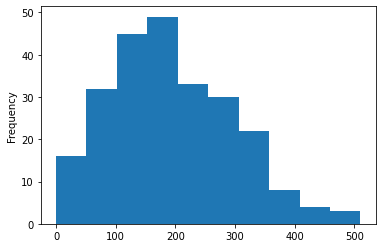

In [84]:
# plot the distribution of the number of calories in drinks using matplotlib
df["Calories"].plot.hist()

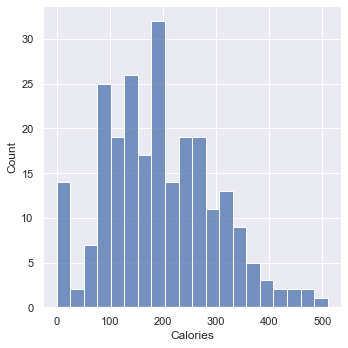

In [89]:
# plot the same distribution using seaborn. what about a density plot instead?
sns.displot(data = df, x = "Calories", bins = 20)

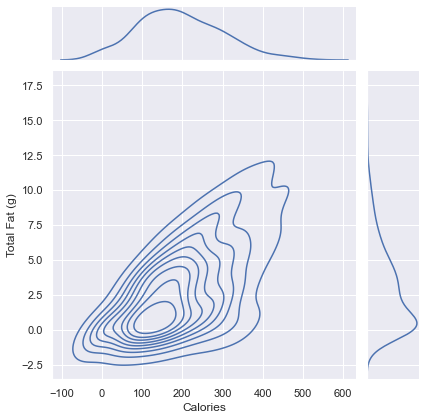

In [91]:
# plot calories against total fat using seaborn
sns.jointplot(data=df, x="Calories", y="Total Fat (g)", kind="kde")

Beverage_prep
2% Milk               AxesSubplot(0.125,0.125;0.775x0.755)
Doppio                AxesSubplot(0.125,0.125;0.775x0.755)
Grande                AxesSubplot(0.125,0.125;0.775x0.755)
Grande Nonfat Milk    AxesSubplot(0.125,0.125;0.775x0.755)
Short                 AxesSubplot(0.125,0.125;0.775x0.755)
Short Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Solo                  AxesSubplot(0.125,0.125;0.775x0.755)
Soymilk               AxesSubplot(0.125,0.125;0.775x0.755)
Tall                  AxesSubplot(0.125,0.125;0.775x0.755)
Tall Nonfat Milk      AxesSubplot(0.125,0.125;0.775x0.755)
Venti                 AxesSubplot(0.125,0.125;0.775x0.755)
Venti Nonfat Milk     AxesSubplot(0.125,0.125;0.775x0.755)
Whole Milk            AxesSubplot(0.125,0.125;0.775x0.755)
Name: Calories, dtype: object

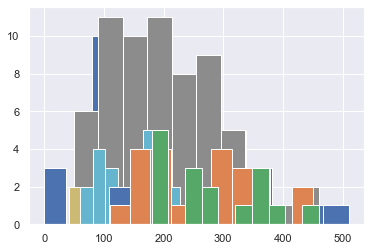

In [107]:
# plot the distribution of calories in Short, Tall, Grande, and Venti drinks
# (you can use multiple lines for this)
# twist: you should also include the Nonfat Milk drinks that also have an associated size.

# you can decide how you want to visualize this. Colors? Small multiples? Density vs histogram?
# the starbucks is your oyster.
df.groupby("Beverage_prep")["Calories"].hist()

